In [1]:
# Import requrired packages
import numpy as np
# sklearn is just used to import a random dataset and to split the dataset into train and test
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

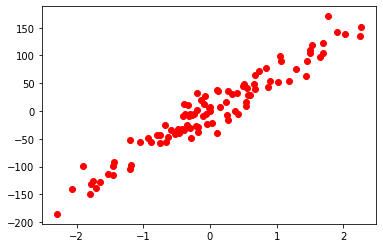

In [2]:
# Generate a random regression problem.
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=7)
# Analyze the data
# print(X[:, 0])
plt.scatter(X[:, 0], y, c='r', marker='o')

In [3]:
# Using a sklearn function to split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Linear Regression
We want to predict the data using linear function here.

We use:
y = wx+b; where w(Weights) is slope an b(bias) is the shift along Y-axis in 2D case

This **y** gives us gives **y_approximation**

#### y and x:
    x is the independent variable. In machine learning we call these variables features.
    y is dependent variable. In machine learning we call these variables target.

#### Weight:
    the coefficient for the independent variable. In machine learning we call coefficients weights.

#### Bias:
    the intercept where our line intercepts the y-axis. In machine learning we can call intercepts bias. Bias offsets all predictions that we make. 
    
## Cost Function:
#### Mean Sqauared Error
![MSE](images/mse.jpg)

where ŷ is calculated from formuala y = wx+b

Now we want error as small as possible, so we want minimum of the MSE function.
To find minimum, we calculate derivative(or gradient) wrt weight and bias, i.e.

![Derivative_MSE](images/derivative_mse.png)

## Gradient Descent:
This is an iterative method to get minimum. We have some base values and then we move to the steepest descent. We go to the negative direction of the gradient.
![Gradient Descent](images/gd_graph.png)

### Update Rules
w = w - α.dw

b = b - α.db

(α is learning rate and negative sign means we go to minimum)

![Derivative](images/derivative_gd.png)

In [4]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate  # Learning rate should be less as we need to hit minimum
        self.n_iters = n_iters  # no. of iterations we want
        self.weights = None
        self.bias = None
        
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Gradient Descent method:
        for _ in range(self.n_iters):
            # We multiply each weight with feature component and sum it up, and we do this for all samples and finally get one value
            y_approx = np.dot(X_train, self.weights) + self.bias  # y = wx+b
            # Derivative wrt w:
            # Here we want one value for feature vector component. therefore we multiply each sample with predicted value and sum if up.
            # We do this for each feature vector component and get value for each component
            dw = (1/n_samples) * np.dot(X_train.T, (y_approx-y_train)) # 2 is just scaling entity so we can omit
            # Derivative wrt bias:
            db = (1/n_samples) * np.sum(y_approx-y_train)
            # Update rules now:
            self.weights -= self.learning_rate*dw 
            self.bias -= self.learning_rate*db 

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.weights) + self.bias  # y = wx+b
        return y_pred
    
    def mean_sq_error(self, y_true, y_prediction):
        mse = np.mean((y_true-y_prediction)**2)
        return mse 

In [5]:
regressor = LinearRegression()
# Call fit function to train
regressor.fit(X_train, y_train)
# Call predicted function
y_predicted = regressor.predict(X_test)
# To get error values
mse = regressor.mean_sq_error(y_test, y_predicted)
print(mse)

387.4276539117133


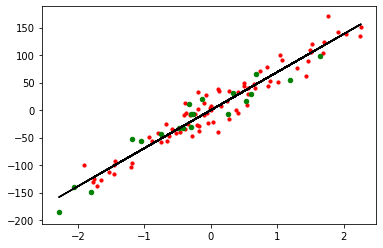

In [6]:
# Now plot
plt.scatter(X_train, y_train, c='r', s=10)
plt.scatter(X_test, y_test, c='g', s=20)
# For best fit line
y_pred_line = regressor.predict(X)
plt.plot(X, y_pred_line, c='black', label="Prediction")
plt.show()